In [1]:
%matplotlib inline
import os
import sys
import glob
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import random
import time
import cv2
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage
import scipy
import skimage
import json

In [7]:
IMG_DIR= "./darkflow/results/"
def read_image(IMG_NAME, gray = False):
    g = 0 if gray else 1
    img = cv2.imread(IMG_DIR + IMG_NAME)
    # to convert to RGB
    if g:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

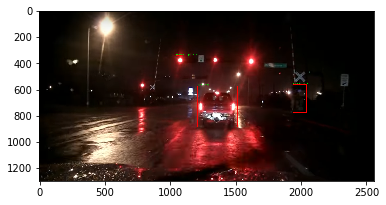

In [66]:
im_pre = "boxed_image_"
im_suf = ".png"

re_pre = "result_"
re_suf = ".txt"

num_list = [0, 2, 6, 7, 11, 12, 13, 16, 17, 20, 22, 24, 25]

inum = 4
snum = str(num_list[inum])

im1 = read_image(im_pre + snum + im_suf)
plt.imshow(im1)

obj_str = ""
with open(IMG_DIR + re_pre + snum + re_suf, 'r') as f:
    for line in f:
        obj_str = line.strip('"')

In [67]:
jobj = json.loads(obj_str.replace('\'','\"'))
for i in jobj:
    print(i)

{'label': 'person', 'topleft': {'x': 1940, 'y': 559}, 'bottomright': {'x': 2045, 'y': 775}, 'confidence': 0.44962147}
{'label': 'car', 'topleft': {'x': 1212, 'y': 572}, 'bottomright': {'x': 1515, 'y': 885}, 'confidence': 0.45268717}
{'label': 'traffic light', 'topleft': {'x': 1046, 'y': 341}, 'bottomright': {'x': 1092, 'y': 397}, 'confidence': 0.30060524}


In [68]:
xdim = im1.shape[0]
ydim = im1.shape[1]


#compute centers of squares

best_box = -1
min_dist = float('inf')
for ind, i in enumerate(jobj):
    if i['label'] == 'car':
        diff = abs(.6 * xdim - (i['topleft']['x'] + i['bottomright']['x'])/2)
        if diff < min_dist:
            min_dist = diff
            best_box = ind
        
print(best_box)

1


In [ ]:
x_l = jobj[best_box]['topleft']['x']
y_l = jobj[best_box]['topleft']['y']

x_r = jobj[best_box]['bottomright']['x']
y_r = jobj[best_box]['bottomright']['y']

